In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv(r"dataset_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
df.insert(0, "First Name", df['Name'].str.split(', ', expand=True)[1], True)
df.insert(1, "Second Name", df['Name'].str.split(', ', expand=True)[0], True)
df.drop("Name", axis=1, inplace=True)
df.head()

,First Name,Second Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Mr. Owen Harris,Braund,1,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
1,Mrs. John Bradley (Florence Briggs Thayer),Cumings,2,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
2,Miss. Laina,Heikkinen,3,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,Mrs. Jacques Heath (Lily May Peel),Futrelle,4,1,1,female,35.000,1,0,113803,53.100,C123,S
4,Mr. William Henry,Allen,5,0,3,male,35.000,0,0,373450,8.050,NaN,S


In [4]:
df.columns = [column_name.replace(" ","_") for column_name in df.columns]

In [5]:
df.head()

,First_Name,Second_Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Mr. Owen Harris,Braund,1,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
1,Mrs. John Bradley (Florence Briggs Thayer),Cumings,2,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
2,Miss. Laina,Heikkinen,3,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,Mrs. Jacques Heath (Lily May Peel),Futrelle,4,1,1,female,35.000,1,0,113803,53.100,C123,S
4,Mr. William Henry,Allen,5,0,3,male,35.000,0,0,373450,8.050,NaN,S


In [6]:
df.index = df["PassengerId"].values
df.drop("PassengerId", axis=1, inplace=True)
df.head()

,First_Name,Second_Name,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,Mr. Owen Harris,Braund,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
3,Miss. Laina,Heikkinen,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000,1,0,113803,53.100,C123,S
5,Mr. William Henry,Allen,0,3,male,35.000,0,0,373450,8.050,NaN,S


In [7]:
def grab_column_names(df, categoric_threshold=10, cardinal_threshold=30):

    categoric_columns = [sütun for sütun in df.columns if df[sütun].dtypes in ["O"]]
    numeric_but_categoric = [sütun for sütun in df.columns if df[sütun].nunique() < categoric_threshold and df[sütun].dtypes not in ["O"]]
    categoric_but_cardinal = [sütun for sütun in df.columns if df[sütun].nunique() > cardinal_threshold and df[sütun].dtypes in ["O"]]
    categoric_columns = categoric_columns + numeric_but_categoric
    categoric_columns = [sütun for sütun in categoric_columns if sütun not in categoric_but_cardinal]
    
    
    numeric_columns = [sütun for sütun in df.columns if df[sütun].dtypes not in ["O"]]
    numeric_columns = [sütun for sütun in numeric_columns if sütun not in numeric_but_categoric]

    print("Categoric Columns= {0}".format(categoric_columns))
    print("Numeric Columns= {0}".format(numeric_columns))
    print("Categoric but Cardinal Columns= {0}".format(categoric_but_cardinal))
    print("Numeric but Categoric Columns= {0}".format(numeric_but_categoric))
    return categoric_columns, numeric_columns, categoric_but_cardinal, numeric_but_categoric

categoric_columns, numeric_columns, categoric_but_cardinal_columns, numeric_but_categoric_columns = grab_column_names(df)

Categoric Columns= ['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
Numeric Columns= ['Age', 'Fare']
Categoric but Cardinal Columns= ['First_Name', 'Second_Name', 'Ticket', 'Cabin']
Numeric but Categoric Columns= ['Survived', 'Pclass', 'SibSp', 'Parch']


In [8]:
def check_df(df, head=5):
    print("##################### Types #####################")
    print(df.dtypes)
    print("##################### NA #####################")
    print(df.isnull().sum())
    print("##################### Quantiles #####################")
    print(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Types #####################
First_Name      object
Second_Name     object
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### NA #####################
First_Name       0
Second_Name      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
##################### Quantiles #####################
           count   mean    std   min    0%    5%    50%     95%     99%    100%     max
Survived 891.000  0.384  0.487 0.000 0.000 0.000  0.000   1.000   1.000   1.000   1.000
Pclass   891.000  2.309  0.836 1.000 1.000 1.000  3.000   3.000   3.000   3.000   3.000
Age      714.000 29.699 14.526 0.420 0.420 4.000 28.00

        Sex  Ratio
male    577 64.759
female  314 35.241
##########################################


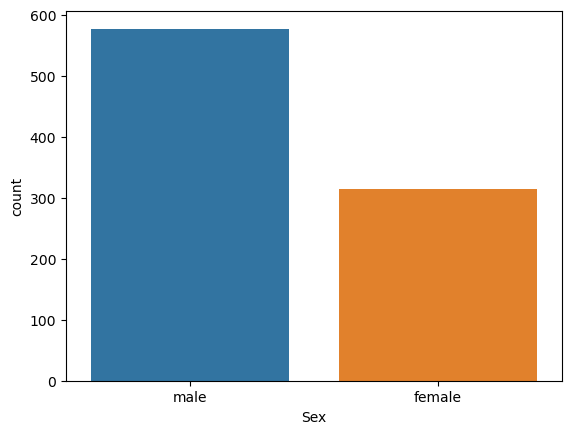

   Embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
##########################################


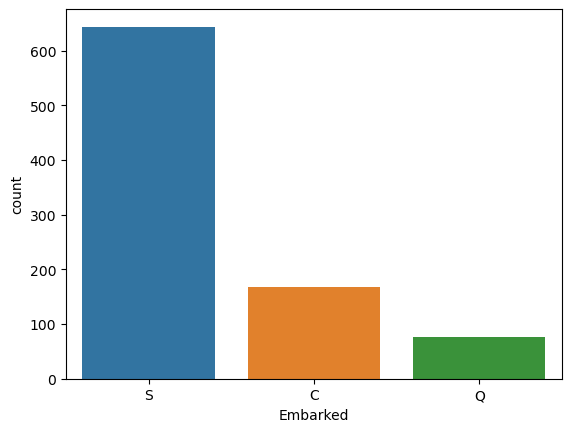

   Survived  Ratio
0       549 61.616
1       342 38.384
##########################################


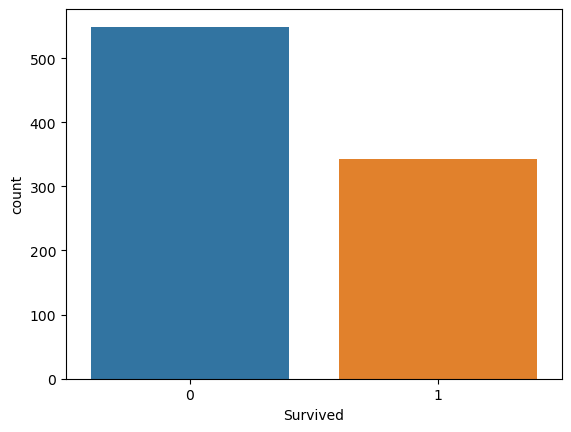

   Pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
##########################################


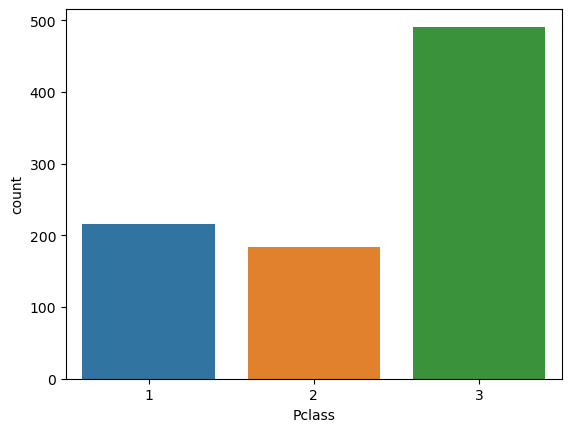

   SibSp  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561
##########################################


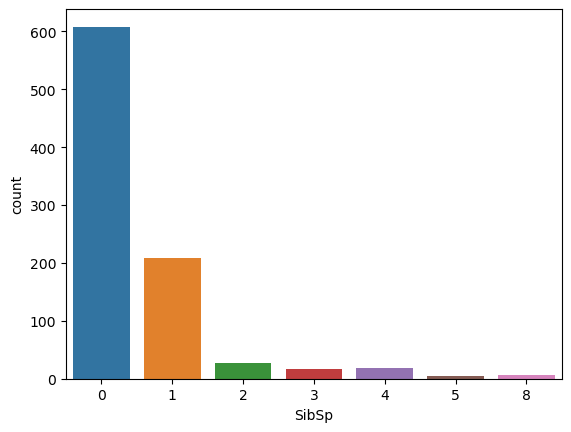

   Parch  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112
##########################################


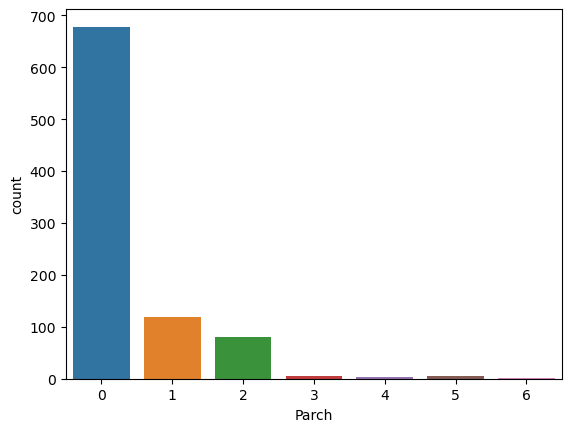

In [9]:
def categoric_columns_summary(df, sütun, plot=False):

    if df[sütun].dtypes == "bool":
        df[sütun] = df[sütun].astype(int)

        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)
    else:
        print(pd.DataFrame({sütun: df[sütun].value_counts(),
                            "Ratio": 100 * df[sütun].value_counts() / len(df)}))
        print("##########################################")

        if plot:
            sns.countplot(x=df[sütun], data=df)
            plt.show(block=True)

for sütun in categoric_columns:
    categoric_columns_summary(df, sütun, plot=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


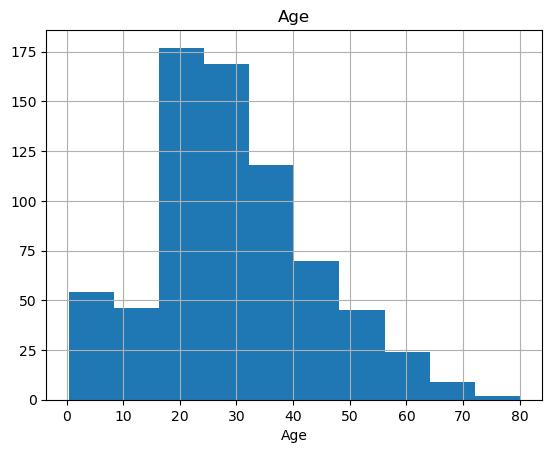

count   891.000
mean     32.204
std      49.693
min       0.000
5%        7.225
10%       7.550
20%       7.854
30%       8.050
40%      10.500
50%      14.454
60%      21.679
70%      27.000
80%      39.688
90%      77.958
95%     112.079
99%     249.006
max     512.329
Name: Fare, dtype: float64


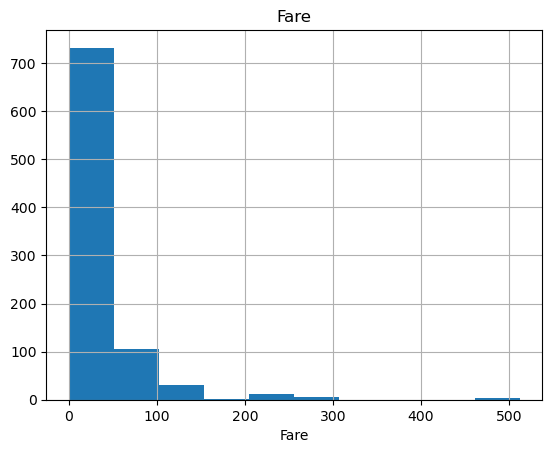

In [10]:
def numeric_columns_summary(df, sütun, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[sütun].describe(quantiles).T)

    if plot:
        df[sütun].hist()
        plt.xlabel(sütun)
        plt.title(sütun)
        plt.show(block=True)

for sütun in numeric_columns:
    numeric_columns_summary(df, sütun, plot=True)

In [11]:
def target_summary_with_categoric_columns(df, target_column, sütun):
    print(pd.DataFrame({target_column + "_MEAN": df.groupby(sütun)[target_column].mean()}), end="\n\n\n")
   
for sütun in categoric_columns:
    print("##########################################")
    target_summary_with_categoric_columns(df, "Survived", sütun)

##########################################
        Survived_MEAN
Sex                  
female          0.742
male            0.189


##########################################
          Survived_MEAN
Embarked               
C                 0.554
Q                 0.390
S                 0.337


##########################################
          Survived_MEAN
Survived               
0                 0.000
1                 1.000


##########################################
        Survived_MEAN
Pclass               
1               0.630
2               0.473
3               0.242


##########################################
       Survived_MEAN
SibSp               
0              0.345
1              0.536
2              0.464
3              0.250
4              0.167
5              0.000
8              0.000


##########################################
       Survived_MEAN
Parch               
0              0.344
1              0.551
2              0.500
3              0.600
4  

In [12]:
def target_summary_with_numeric_columns(df, target_column, sütun):
    print(df.groupby(target_column).agg({sütun: "mean"}), end="\n\n\n")

for sütun in numeric_columns:
    print("##########################################")
    target_summary_with_numeric_columns(df, "Survived", sütun)

##########################################
            Age
Survived       
0        30.626
1        28.344


##########################################
           Fare
Survived       
0        22.118
1        48.395




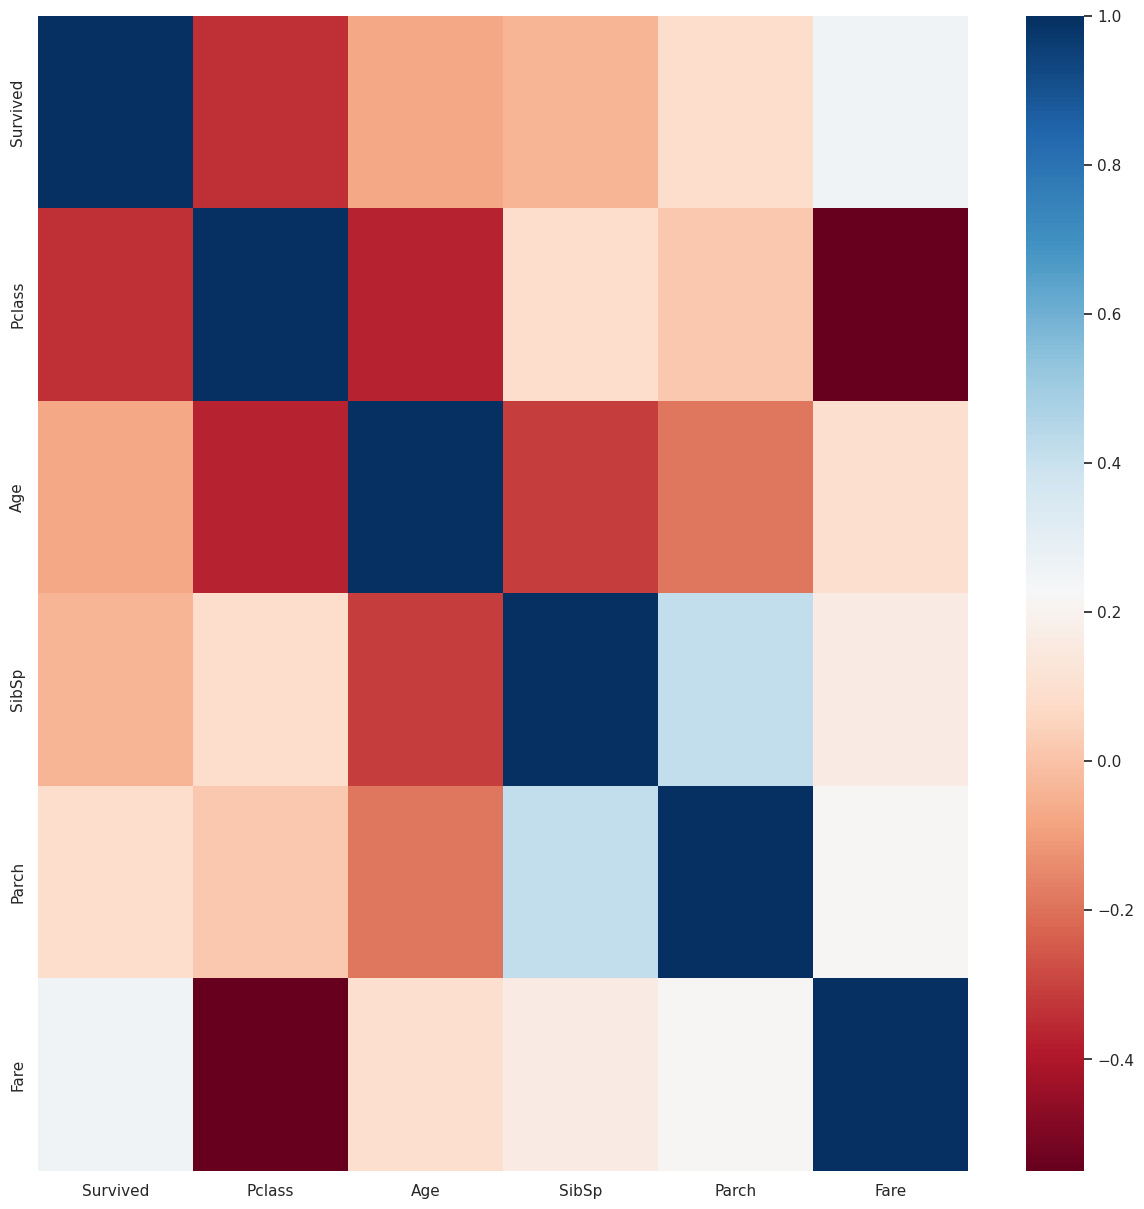

In [13]:
def high_correlated_columns(df, plot=False, corr_th=0.90):
    corr = df.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [sütun for sütun in upper_triangle_matrix.columns if any(upper_triangle_matrix[sütun] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

drop_list = high_correlated_columns(df, plot=True)

In [14]:
drop_list

[]

In [15]:
df.drop(drop_list, axis=1).head()

,First_Name,Second_Name,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,Mr. Owen Harris,Braund,0,3,male,22.000,1,0,A/5 21171,7.250,NaN,S
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000,1,0,PC 17599,71.283,C85,C
3,Miss. Laina,Heikkinen,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000,1,0,113803,53.100,C123,S
5,Mr. William Henry,Allen,0,3,male,35.000,0,0,373450,8.050,NaN,S


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.698618x0.77)
Axes(0.125,0.11;0.62x0.77)
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


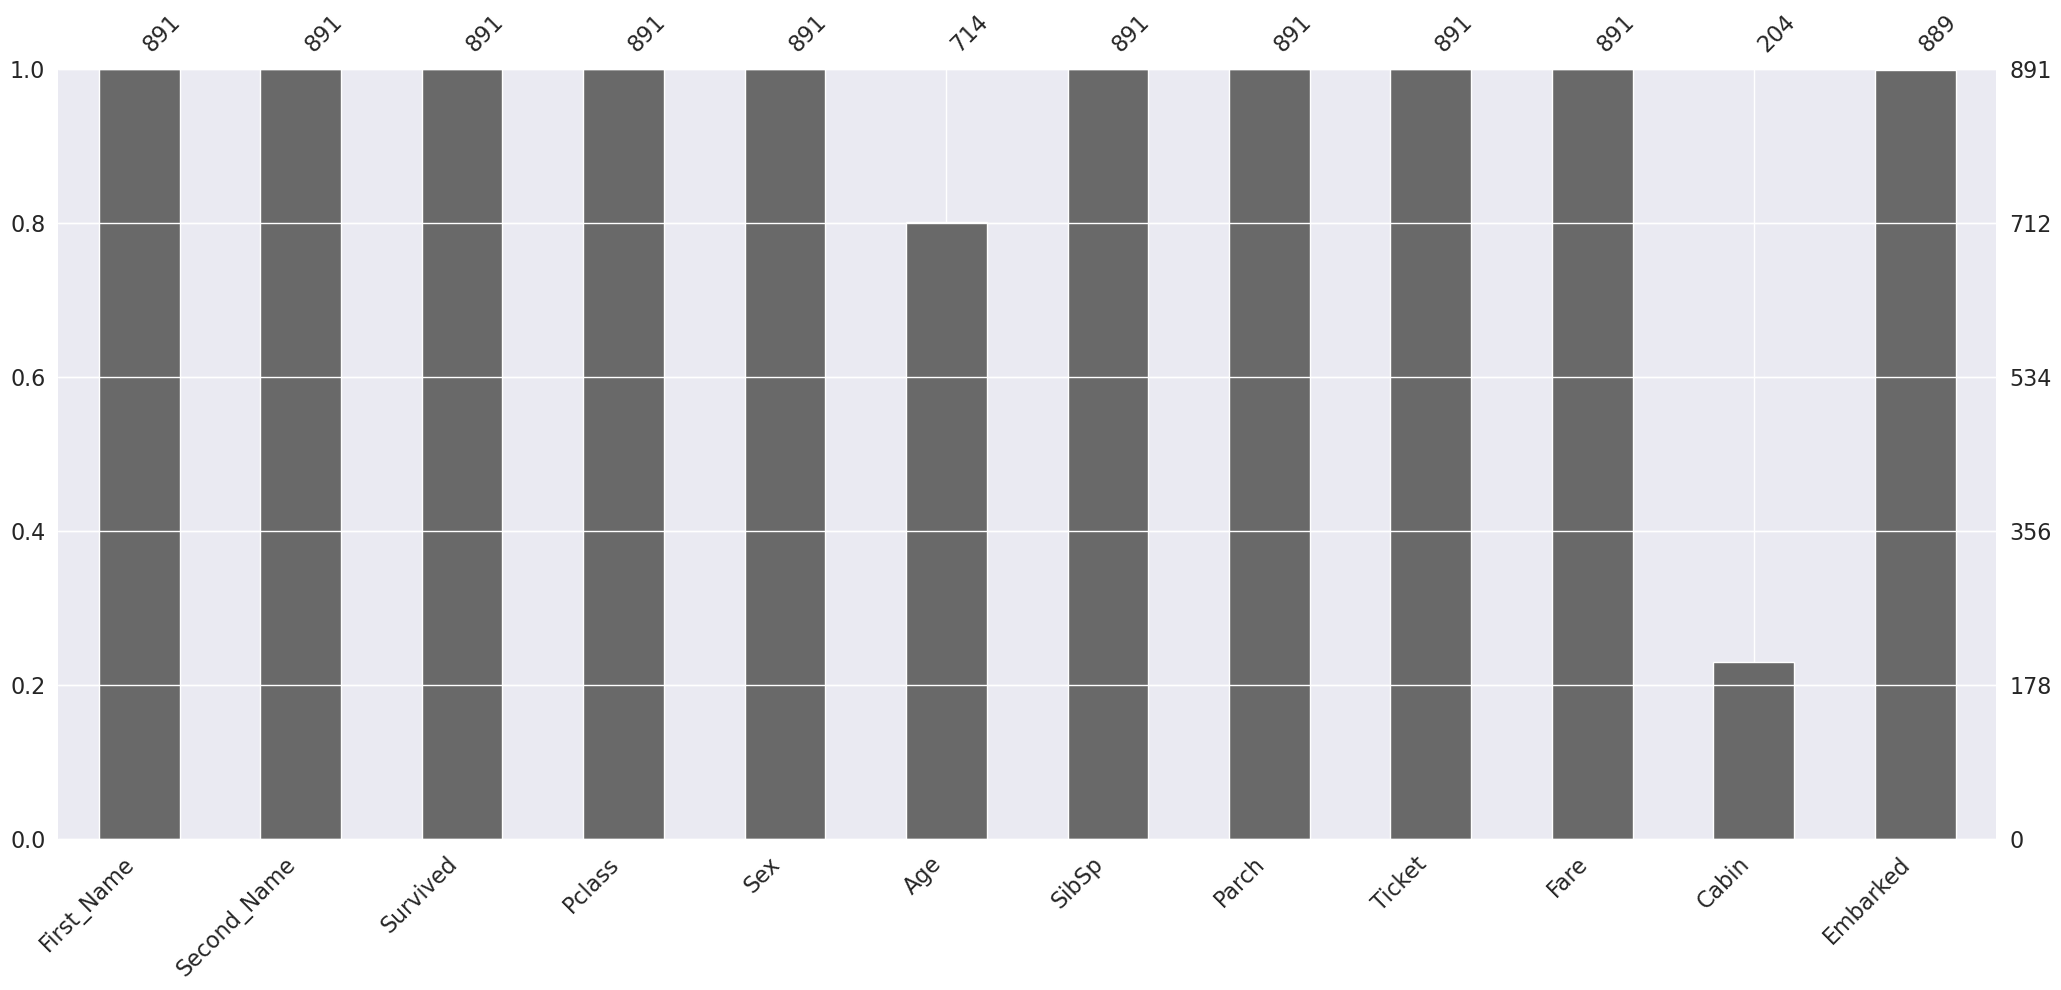

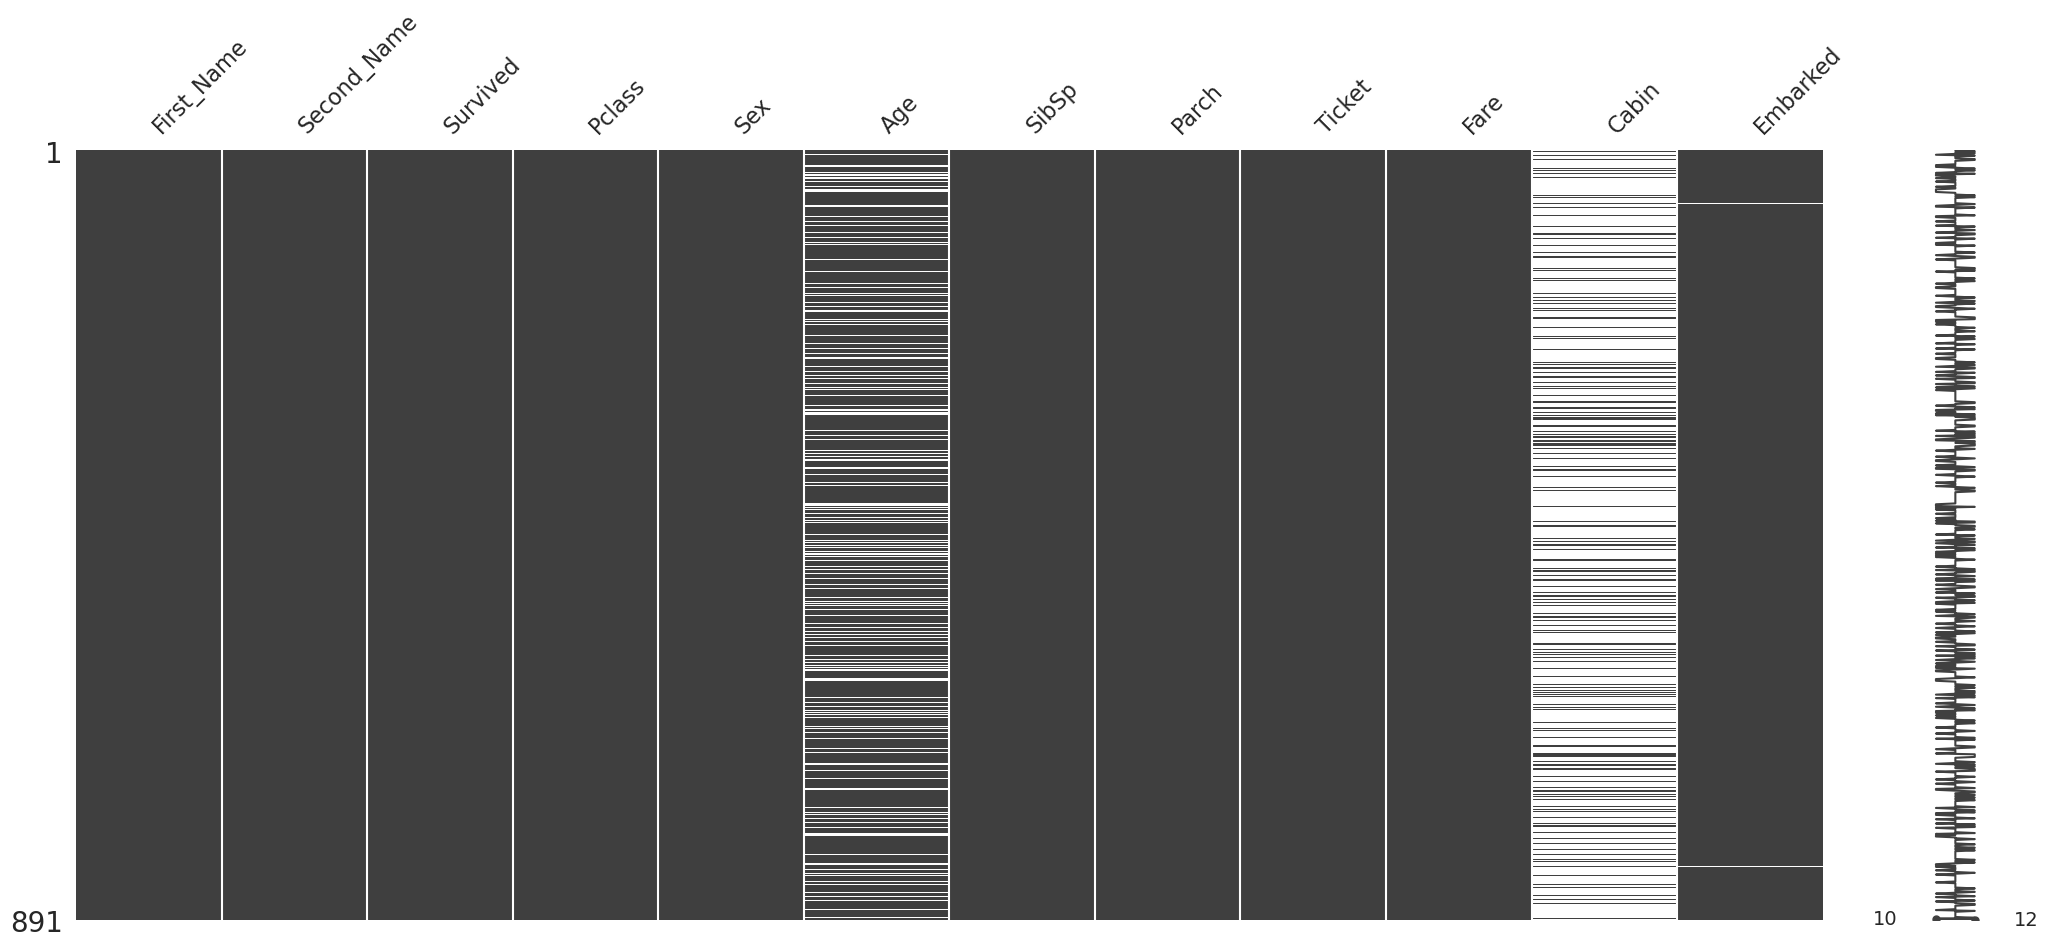

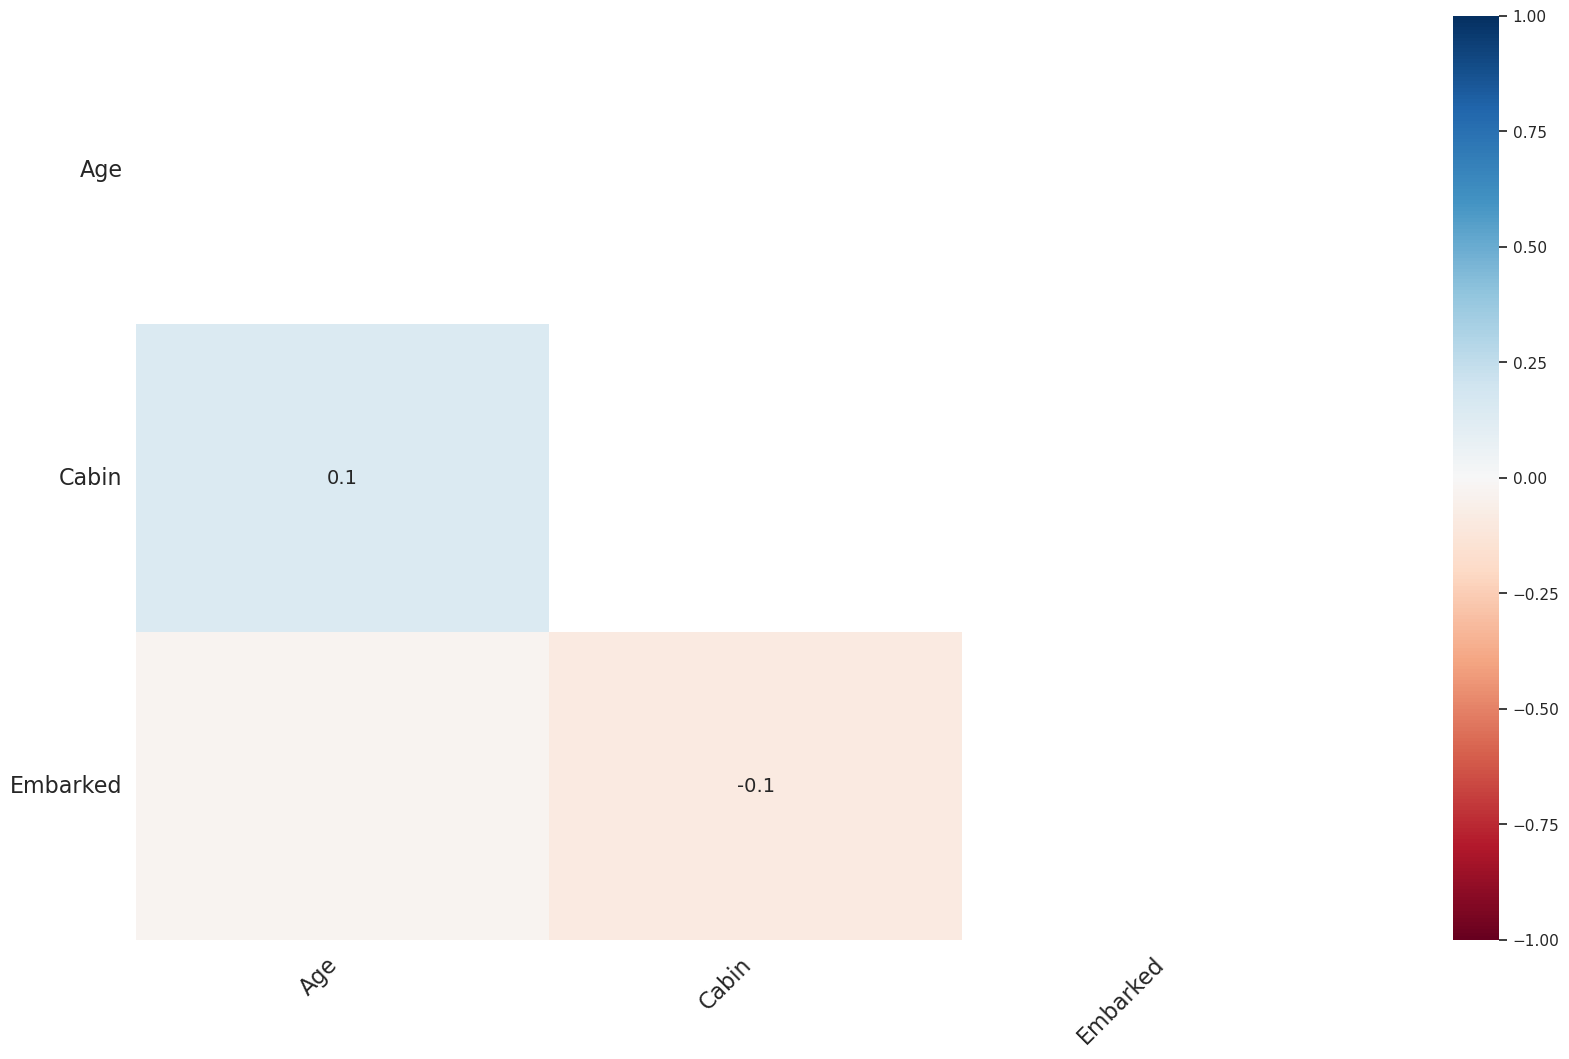

In [16]:
def missing_values_table(df, na_columns_name=False):

    print(msno.bar(df))

    print(msno.matrix(df))

    print(msno.heatmap(df))


    na_columns = [sütun for sütun in df.columns if df[sütun].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_columns_name:
        return na_columns

na_columns = missing_values_table(df, True)

In [17]:
def missing_vs_target(df, target_column, na_column):
    temp_df = df.copy()

    for sütun in na_column:
        temp_df[sütun + '_NA_FLAG'] = np.where(temp_df[sütun].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for sütun in na_flags:
        print(pd.DataFrame({target_column + "_MEAN": temp_df.groupby(sütun)[target_column].mean(),
                            "Count": temp_df.groupby(sütun)[target_column].count()}), end="\n\n\n")

missing_vs_target(df, "Survived", na_columns)

             Survived_MEAN  Count
Age_NA_FLAG                      
0                    0.406    714
1                    0.294    177


               Survived_MEAN  Count
Cabin_NA_FLAG                      
0                      0.667    204
1                      0.300    687


                  Survived_MEAN  Count
Embarked_NA_FLAG                      
0                         0.382    889
1                         1.000      2




In [18]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [19]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("median"),inplace=True)

In [20]:
df["Cabin"] = df.groupby(['Second_Name', 'SibSp', 'Parch'], group_keys=False)['Cabin'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [21]:
df.drop("Cabin", inplace=True, axis=1)

In [22]:
df.head()

,First_Name,Second_Name,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,Mr. Owen Harris,Braund,0,3,male,22.000,1,0,A/5 21171,7.250,S
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,1,female,38.000,1,0,PC 17599,71.283,C
3,Miss. Laina,Heikkinen,1,3,female,26.000,0,0,STON/O2. 3101282,7.925,S
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,1,female,35.000,1,0,113803,53.100,S
5,Mr. William Henry,Allen,0,3,male,35.000,0,0,373450,8.050,S


In [23]:
def outlier_thresholds(df, sütun, q1=0.25, q3=0.75):
    quartile1 = df[sütun].quantile(q1)
    quartile3 = df[sütun].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "Age")

(2.5, 54.5)

In [24]:
def grab_outliers(df, sütun, index=False):
    low, up = outlier_thresholds(df, sütun)

    if df[((df[sütun] < low) | (df[sütun] > up))].shape[0] > 10:
        print(df[((df[sütun] < low) | (df[sütun] > up))].head())
    else:
        print(df[((df[sütun] < low) | (df[sütun] > up))])

    if index:
        outlier_index = df[((df[sütun] < low) | (df[sütun] > up))].index
        return outlier_index
    
age_index = grab_outliers(df, "Age", True)

                 First_Name Second_Name  Survived  Pclass     Sex    Age  SibSp  Parch      Ticket   Fare Embarked
8     Master. Gosta Leonard     Palsson         0       3    male  2.000      3      1      349909 21.075        S
12          Miss. Elizabeth     Bonnell         1       1  female 58.000      0      0      113783 26.550        S
16  Mrs. (Mary D Kingcome)      Hewlett         1       2  female 55.000      0      0      248706 16.000        S
17           Master. Eugene        Rice         0       3    male  2.000      4      1      382652 29.125        Q
34             Mr. Edward H     Wheadon         0       2    male 66.000      0      0  C.A. 24579 10.500        S


In [25]:
age_index = grab_outliers(df, "Fare", True)

                                    First_Name Second_Name  Survived  Pclass     Sex    Age  SibSp  Parch    Ticket    Fare Embarked
2   Mrs. John Bradley (Florence Briggs Thayer)     Cumings         1       1  female 38.000      1      0  PC 17599  71.283        C
28                       Mr. Charles Alexander     Fortune         0       1    male 19.000      3      2     19950 263.000        S
32       Mrs. William Augustus (Marie Eugenie)     Spencer         1       1  female 27.000      1      0  PC 17569 146.521        C
35                            Mr. Edgar Joseph       Meyer         0       1    male 28.000      1      0  PC 17604  82.171        C
53            Mrs. Henry Sleeper (Myna Haxtun)      Harper         1       1  female 49.000      1      0  PC 17572  76.729        C


In [26]:
ohe_colums = [sütun for sütun in df.columns if 10 >= df[sütun].nunique() > 2]

def one_hot_encoder(df, categorical_column, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_column, drop_first=drop_first)
    return df

one_hot_encoder(df, ohe_colums).head()

,First_Name,Second_Name,Survived,Sex,Age,Ticket,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
1,Mr. Owen Harris,Braund,0,male,22.000,A/5 21171,7.250,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,female,38.000,PC 17599,71.283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Miss. Laina,Heikkinen,1,female,26.000,STON/O2. 3101282,7.925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,female,35.000,113803,53.100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Mr. William Henry,Allen,0,male,35.000,373450,8.050,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
def segmentation_for_numerical_columns(df,sütun):
    df[sütun]=pd.qcut(df[sütun], len(["Çok Düşük", "Düşük", "Orta","Yüksek","Çok Yüksek"]), labels=["Çok Düşük", "Düşük", "Orta","Yüksek","Çok Yüksek"])
        
for sütun in numeric_columns:        
    segmentation_for_numerical_columns(df,sütun)

In [28]:
df.loc[((df['SibSp'] + df['Parch']) > 0), "NEW_IS_ALONE"] = "NO"

df.loc[((df['SibSp'] + df['Parch']) == 0), "NEW_IS_ALONE"] = "YES"

In [29]:
df.head()

,First_Name,Second_Name,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NEW_IS_ALONE
1,Mr. Owen Harris,Braund,0,3,male,Düşük,1,0,A/5 21171,Çok Düşük,S,NO
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,1,female,Yüksek,1,0,PC 17599,Çok Yüksek,C,NO
3,Miss. Laina,Heikkinen,1,3,female,Düşük,0,0,STON/O2. 3101282,Düşük,S,YES
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,1,female,Yüksek,1,0,113803,Çok Yüksek,S,NO
5,Mr. William Henry,Allen,0,3,male,Yüksek,0,0,373450,Düşük,S,YES


In [30]:
ohe_colums = [sütun for sütun in df.columns if 10 >= df[sütun].nunique() > 2]

def one_hot_encoder(df, categorical_column, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_column, drop_first=drop_first)
    return df

df = one_hot_encoder(df, ohe_colums)
df.head()

,First_Name,Second_Name,Survived,Sex,Ticket,NEW_IS_ALONE,Pclass_2,Pclass_3,Age_Düşük,Age_Orta,Age_Yüksek,Age_Çok Yüksek,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Fare_Düşük,Fare_Orta,Fare_Yüksek,Fare_Çok Yüksek,Embarked_Q,Embarked_S
1,Mr. Owen Harris,Braund,0,male,A/5 21171,NO,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Mrs. John Bradley (Florence Briggs Thayer),Cumings,1,female,PC 17599,NO,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Miss. Laina,Heikkinen,1,female,STON/O2. 3101282,YES,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Mrs. Jacques Heath (Lily May Peel),Futrelle,1,female,113803,NO,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,Mr. William Henry,Allen,0,male,373450,YES,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [31]:
binary_columns = [sütun for sütun in df.columns if df[sütun].dtype not in [int, float] and df[sütun].nunique() == 2]

from sklearn.preprocessing import LabelEncoder
def label_encoder(df, sütun):
    labelencoder = LabelEncoder()
    df[sütun] = labelencoder.fit_transform(df[sütun])
    return df
for sütun in binary_columns:
    df = label_encoder(df, sütun)

In [32]:
X = df.drop(columns=["First_Name","Second_Name","Ticket"])
y = df["Survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

print(knn_gs_best.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'n_neighbors': 5}


In [34]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X_train, y_train)

y_pred = knn_final.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

print("Doğruluk(Accuracy): %f" %accuracy_score(y_test,y_pred))

Doğruluk(Accuracy): 0.962687


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


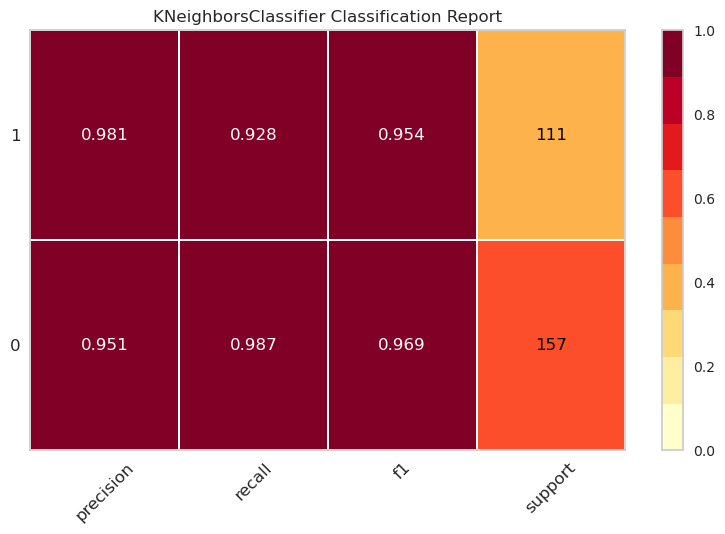

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [36]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(knn_final, classes = ["0","1"], support=True)
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.poof()